In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import QuantileTransformer

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df.shape

(1460, 81)

In [280]:
data = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [281]:
data = data.drop(['PoolQC','Id','Alley','MiscFeature'],axis=1)

In [282]:
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [283]:
data['FireplaceQu'].fillna('None',inplace=True)

In [284]:
data.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [285]:
data.Fence.fillna('None',inplace=True)

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [287]:
data['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

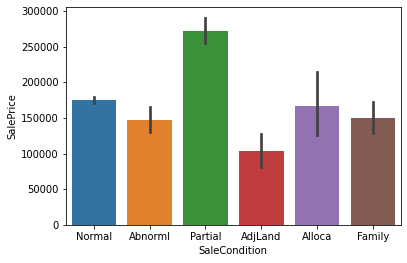

In [288]:
#plt.figure(figsize=(15,10))
sns.barplot(data = data, x = 'SaleCondition', y='SalePrice');

In [289]:
data['MSSubClass']=data['MSSubClass'].astype('category')

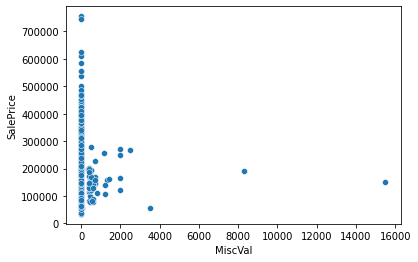

In [290]:
sns.scatterplot(data = data, x = 'MiscVal', y = "SalePrice");

In [291]:
#plt.figure(figsize=(25,25))
#sns.heatmap(data.corr(),annot=True);

In [292]:
rm = ['LotFrontage','LotArea','LotShape','Utilities','LotConfig','LandSlope','Condition2','BldgType','HouseStyle',
     'RoofMatl','Exterior2nd','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','Heating','Electrical','LowQualFinSF','BsmtHalfBath',
     'BedroomAbvGr','KitchenAbvGr','Functional','GarageYrBlt','GarageQual','GarageCond','EnclosedPorch','3SsnPorch','ScreenPorch',
     'PoolArea','Fence','MiscVal','MoSold','YrSold','SaleType','MasVnrArea','OpenPorchSF','WoodDeckSF']

In [293]:
data.shape

(1460, 77)

In [294]:
data = data.drop(rm,axis=1)
data.shape

(1460, 41)

In [295]:
df.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

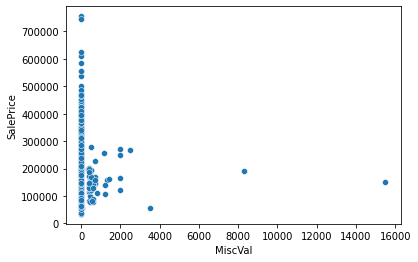

In [296]:
sns.scatterplot(data = df, x= 'MiscVal',y='SalePrice');

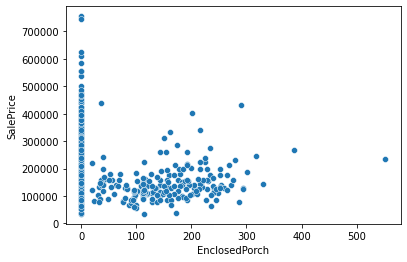

In [297]:
sns.scatterplot(data=df, x='EnclosedPorch', y='SalePrice');

In [298]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

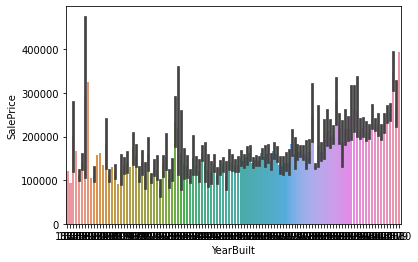

In [299]:
sns.barplot(data = df.sort_values('YearBuilt'),x='YearBuilt',y='SalePrice');

In [300]:
for i in ['GarageType','GarageFinish']:
    data[i].fillna('None',inplace=True)

In [301]:
for i in data.select_dtypes('object').columns:
    data[i].fillna(data[i].mode(),inplace=True)
    data[i] = data[i].astype('category')

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   Street         1460 non-null   category
 3   LandContour    1460 non-null   category
 4   Neighborhood   1460 non-null   category
 5   Condition1     1460 non-null   category
 6   OverallQual    1460 non-null   int64   
 7   OverallCond    1460 non-null   int64   
 8   YearBuilt      1460 non-null   int64   
 9   YearRemodAdd   1460 non-null   int64   
 10  RoofStyle      1460 non-null   category
 11  Exterior1st    1460 non-null   category
 12  MasVnrType     1452 non-null   category
 13  ExterQual      1460 non-null   category
 14  ExterCond      1460 non-null   category
 15  Foundation     1460 non-null   category
 16  BsmtQual       1423 non-null   category
 17  BsmtCond       1423 non-null   ca

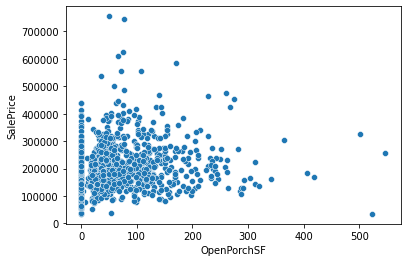

In [303]:
sns.scatterplot(data = df, x='OpenPorchSF', y='SalePrice', hue = None);

In [304]:
def outlier(x):
    mean = x.mean()
    std = x.std()
    x = np.where(x<(mean-3*std),mean-3*std,x)
    x = np.where(x>(mean+3*std),mean+3*std,x)
    return x

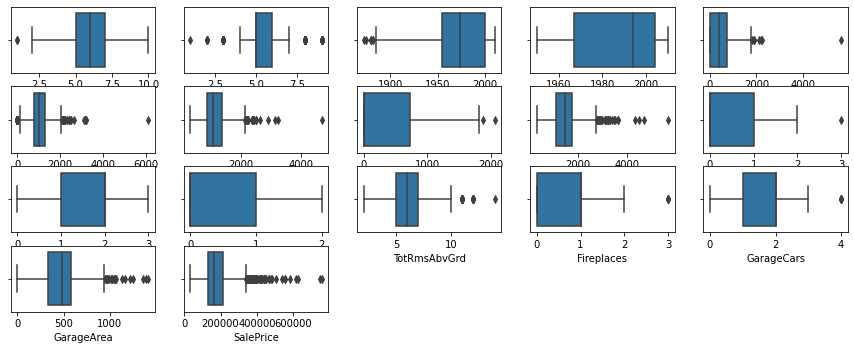

In [305]:
plt.figure(figsize=(15,10))
for i,j in enumerate(data.select_dtypes('int64').columns):
    plt.subplot(7,5,i+1)
    sns.boxplot(x=data[j]);

In [306]:
#data = data.drop(['MSSubClass','Exterior1st'],axis=1)

<AxesSubplot:>

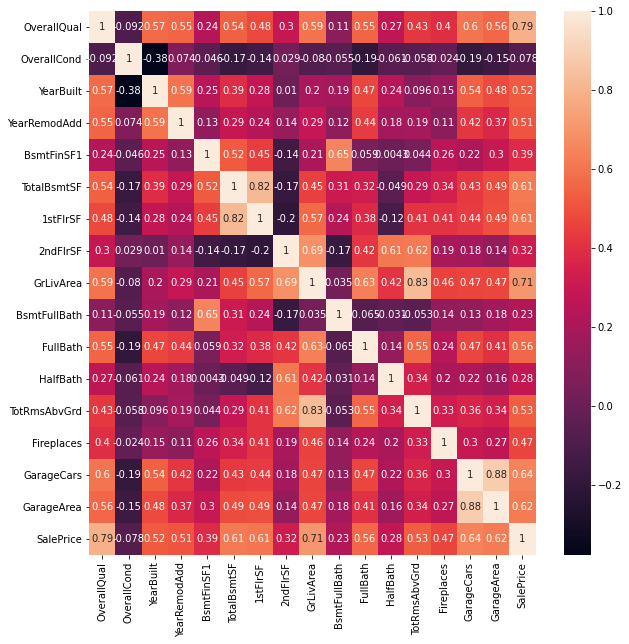

In [307]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [308]:
cols = []
for i in data.select_dtypes(['int64','float64']).columns:
    if len(data[i].value_counts()) > 30:
        cols.append(i)
cols = cols[:-1]

In [309]:
def ready_test(test,pca=False,cols=None):
    test = test.drop(['PoolQC','Id','Alley','MiscFeature'],axis=1)
    test['MSSubClass']=test['MSSubClass'].astype('category')
    test = test.drop(rm,axis=1)
    for i in data.select_dtypes('object').columns:
        test[i].fillna("None",inplace=True)
        test[i] = test[i].astype('category')
    for i in test.select_dtypes(['int64','float64']).columns:
        if len(test[i].value_counts()) < 20:
            test[i].fillna("None",inplace=True)
        else:
            test[i].fillna(test[i].mean(),inplace=True)
    #for i in test.select_dtypes(['int64']).columns:
    #    if len(test[i].value_counts()) < 30:
    #        test[i] = test[i].astype('category')
    if pca:
        data_pca = test[cols]
        data_pca = data_pca.apply(zscore)
        pca = PCA(n_components=0.86)
        output = pca.fit_transform(data_pca)
        test = test.drop(cols,axis=1)
        test = pd.concat([test,pd.DataFrame(output,columns=['PC'+str(i) for i in range(1,output.shape[1]+1)],index=test.index)],axis=1)
    return test

In [310]:
# for i in data.select_dtypes(['int64']).columns:
#     if len(data[i].value_counts()) < 30:
#         data[i] = data[i].astype('category')

In [311]:
data1 = pd.get_dummies(data,drop_first=True)

In [312]:
test1 = ready_test(test)
test1.shape

(1459, 41)

In [313]:
data.shape

(1460, 41)

In [314]:
test2 = pd.get_dummies(test1,drop_first=True)

In [315]:
from sklearn.decomposition import PCA

In [316]:
from scipy.stats import zscore

In [317]:
data_pca = data[cols]
data_pca = data_pca.apply(zscore)

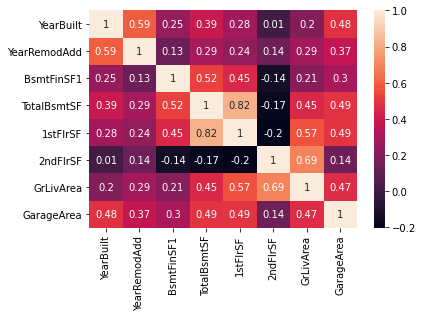

In [318]:
sns.heatmap(data_pca.corr(),annot=True);

In [319]:
pca = PCA(n_components=0.86)
output = pca.fit_transform(data_pca)

In [320]:
#output.shape

In [321]:
#np.cumsum(pca.explained_variance_ratio_)

In [322]:
#data1 = data1.drop(cols,axis=1)
#data1 = pd.concat([data1,pd.DataFrame(output,columns=['PC'+str(i) for i in range(1,5)],index=data1.index)],axis=1)
#data1.shape

In [323]:
data1.head()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,5,2003,2003,706,856,856,854,1710,1,...,0,1,0,0,1,0,0,0,1,0
1,6,8,1976,1976,978,1262,1262,0,1262,0,...,0,1,0,0,1,0,0,0,1,0
2,7,5,2001,2002,486,920,920,866,1786,1,...,0,1,0,0,1,0,0,0,1,0
3,7,5,1915,1970,216,756,961,756,1717,1,...,0,0,1,0,1,0,0,0,0,0
4,8,5,2000,2000,655,1145,1145,1053,2198,1,...,0,1,0,0,1,0,0,0,1,0


In [324]:
X = data1.drop('SalePrice',axis=1)
y = data1[['SalePrice']]

In [325]:
for i in X.columns:
    if i not in test2.columns:
        test2[i] = 0

In [326]:
for i in test2.columns:
    if i not in X.columns:
        test2.drop(i,axis=1,inplace=True)

In [327]:
test2=test2.loc[:,X.columns]

In [328]:
test2.shape

(1459, 147)

In [329]:
data1.shape

(1460, 148)

In [330]:
X.shape

(1460, 147)

In [331]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [332]:
X_train.shape

(1022, 147)

In [333]:
lm = sm.OLS(y_train, X_train)
mod = lm.fit()
mod

In [334]:
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              322.6
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                        0.00
Time:                        11:10:21   Log-Likelihood:                         -11869.
No. Observations:                1022   AIC:                                  2.403e+04
Df Residuals:                     877   BIC:                                  2.474e+04
Df Model:                         145                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [335]:
np.sqrt(mean_squared_error(y_train,mod.predict(X_train)))

26754.924886102308

In [336]:
np.sqrt(mean_squared_error(y_test,mod.predict(X_test)))

31310.599525370933

In [337]:
lmod = LinearRegression()
lmod.fit(X_train,y_train)

LinearRegression()

In [338]:
lmod.score(X_train,y_train)

0.8817812071807718

In [339]:
lmod.score(X_test,y_test)

0.8601395612102566

In [340]:
np.sqrt(mean_squared_error(y_train,lmod.predict(X_train)))

26674.12090974913

In [341]:
np.sqrt(mean_squared_error(y_test,lmod.predict(X_test)))

31240.34659412315

In [342]:
test['SalePrice'] = lmod.predict(test2)
test[['Id','SalePrice']].to_csv('final.csv',index=False)

In [343]:
from sklearn.tree import DecisionTreeRegressor

In [344]:
dt = DecisionTreeRegressor(random_state=42,max_depth=9,min_samples_leaf=1)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)

In [345]:
dt.score(X_train,y_train)

0.9719869423779102

In [346]:
dt.score(X_test,y_test)

0.8241968333404363

In [347]:
np.sqrt(mean_squared_error(y_train,dt.predict(X_train)))

12984.556264482066

In [348]:
np.sqrt(mean_squared_error(y_test,dt.predict(X_test)))

35025.290582955546

In [349]:
test['SalePrice'] = dt.predict(test2)
test[['Id','SalePrice']].to_csv('final.csv',index=False)

In [350]:
print(dt.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [351]:
from sklearn import tree

In [352]:
data.SalePrice.mean()

180921.19589041095

In [353]:
from sklearn.ensemble import GradientBoostingRegressor

In [354]:
gbr = GradientBoostingRegressor(random_state=42,max_depth=3,learning_rate=0.1)
gbr.fit(X_train,y_train)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [355]:
gbr.score(X_train,y_train)

0.9649670590043902

In [356]:
gbr.score(X_test,y_test)

0.9092015827350863

In [357]:
test['SalePrice'] = gbr.predict(test2)
test[['Id','SalePrice']].to_csv('final.csv',index=False)

In [358]:
from sklearn.ensemble import RandomForestRegressor

In [393]:
rf = RandomForestRegressor(n_estimators=60,max_depth=8,random_state=42)
rf.fit(X_train,y_train)

<ipython-input-393-212100794121>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor(max_depth=8, n_estimators=60, random_state=42)

In [394]:
rf.score(X_train,y_train)

0.9621264971304294

In [395]:
rf.score(X_test,y_test)

0.9038208775491661

In [396]:
test['SalePrice'] = rf.predict(test2)
test[['Id','SalePrice']].to_csv('final.csv',index=False)

In [397]:
#multicollinear

In [398]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [408]:
print(pd.Series([vif(data1.drop('SalePrice',axis=1),i) for i in range(X.shape[1])],index=X.columns).idxmax())

Condition1_RRNe        1.140582e+00
Exterior1st_ImStucc    1.150799e+00
Foundation_Wood        1.161511e+00
Exterior1st_AsphShn    1.181341e+00
Foundation_Stone       1.222396e+00
                           ...     
GrLivArea              1.612381e+03
YearRemodAdd           2.316342e+04
YearBuilt              2.351623e+04
GarageType_None                 inf
GarageFinish_None               inf
Length: 147, dtype: float64


In [472]:
x = data1.drop('SalePrice',axis=1)
Y = data1['SalePrice']

In [473]:
def get_max(temp,l):
#     temp = temp.reset_index()
    temp = temp.sort_values(ascending = False).reset_index()
    j = 0
    while True:
        if temp['index'][j] in l:
            j += 1
            continue
        else:
            return temp['index'][j], temp[0][j]

In [475]:
l = []
i = 0
while True:
    temp = pd.Series([vif(x,i) for i in range(x.shape[1])],index=x.columns)
    res1 = sm.OLS(Y,x)
    mod1 = res1.fit()
    a = mod1.rsquared
    col,m = get_max(temp, l)
    if m < 5:
        break
    x1 = x.drop(col,axis=1)
    res2 = sm.OLS(Y,x1)
    mod2 = res2.fit()
    b = mod2.rsquared
    i+=1
    print("Cycle :",i,", col:",col,"max:",m,", diff:",a-b)
    if (a-b) > -0.05 and (a-b) < 0.05:
        x = x.drop(col,axis=1)
    else:
        l.append(col)

Cycle : 1 , col: GarageType_None max: inf , diff: 0.0
Cycle : 2 , col: YearBuilt max: 23516.226206715797 , diff: 1.1849977228362008e-06
Cycle : 3 , col: YearRemodAdd max: 2283.3774264584094 , diff: 9.649405087297502e-06
Cycle : 4 , col: GrLivArea max: 1600.1108338004028 , diff: 6.302472964958561e-05
Cycle : 5 , col: ExterCond_TA max: 370.5732328133995 , diff: 4.3045916115369565e-05
Cycle : 6 , col: Street_Pave max: 304.3052842376179 , diff: 9.851720874642922e-07
Cycle : 7 , col: MSZoning_RL max: 169.40157933814598 , diff: 4.414310684264233e-05
Cycle : 8 , col: GarageType_Attchd max: 140.21000185964857 , diff: 4.063281274835351e-05
Cycle : 9 , col: RoofStyle_Gable max: 105.0754576647824 , diff: 7.176944317954792e-06
Cycle : 10 , col: 1stFlrSF max: 95.4218389656394 , diff: 0.0006636326571205498
Cycle : 11 , col: OverallQual max: 87.54042592498735 , diff: 0.0011156310681262882
Cycle : 12 , col: TotRmsAbvGrd max: 60.98928001711393 , diff: 0.00041278887235918216
Cycle : 13 , col: GarageCars

In [476]:
l

[]

In [477]:
data1.shape

(1460, 148)

In [478]:
x.shape

(1460, 110)

In [479]:
y.shape

(1460, 1)

In [481]:
mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              199.3
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                        0.00
Time:                        13:55:18   Log-Likelihood:                         -17796.
No. Observations:                1460   AIC:                                  3.581e+04
Df Residuals:                    1350   BIC:                                  3.639e+04
Df Model:                         110                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [482]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [484]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [485]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.8817812071807718

In [486]:
lr.score(X_test,y_test)

0.8601395612102566

In [487]:
dt.fit(X_train,y_train)
dt.score(X_train,y_train)

0.9719869423779102

In [488]:
dt.score(X_test,y_test)

0.8241968333404363

In [490]:
gbr.fit(X_train,y_train)
gbr.score(X_train,y_train)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9649670590043902

In [491]:
gbr.score(X_test,y_test)

0.9092015827350863

In [492]:
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

<ipython-input-492-133cccfe5d78>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.9621264971304294

In [493]:
rf.score(X_test,y_test)

0.9038208775491661